In [1]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
pima = pd.read_csv('https://raw.githubusercontent.com/manishanker/stats_ml_jun2020/master/diabetes_csv.csv')

In [3]:
pima.shape

(768, 9)

In [6]:
len(pima.columns)

9

In [7]:
pima.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
pima.isna().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [9]:
pima.head(10)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


In [12]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [13]:
import seaborn as sns

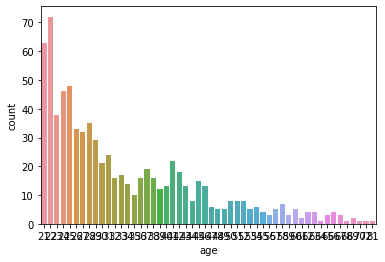

In [14]:
sns.countplot('age', data=pima)

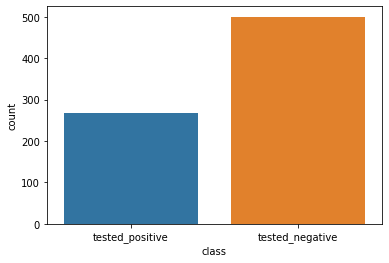

In [15]:
sns.countplot('class', data=pima)

In [19]:
pima['preg'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

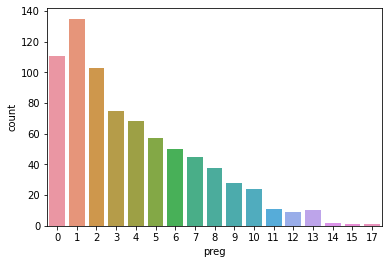

In [20]:
sns.countplot('preg', data=pima)

In [21]:
import matplotlib.pyplot as plt

In [22]:
pima.columns

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <a list of 10 Patch objects>)

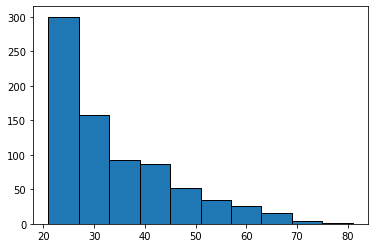

In [23]:
plt.hist(pima['age'], edgecolor='black')

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

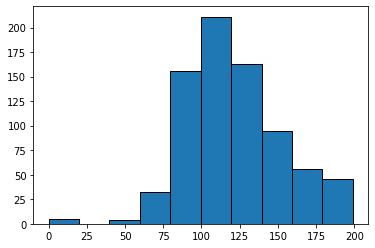

In [24]:
plt.hist(pima['plas'], edgecolor='black')

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <a list of 10 Patch objects>)

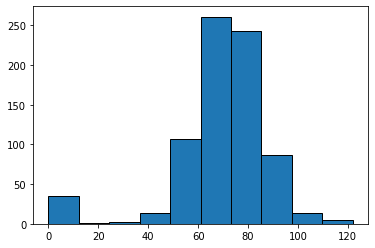

In [25]:
plt.hist(pima['pres'], edgecolor='black')

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

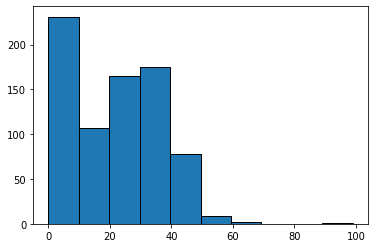

In [26]:
plt.hist(pima['skin'], edgecolor='black')

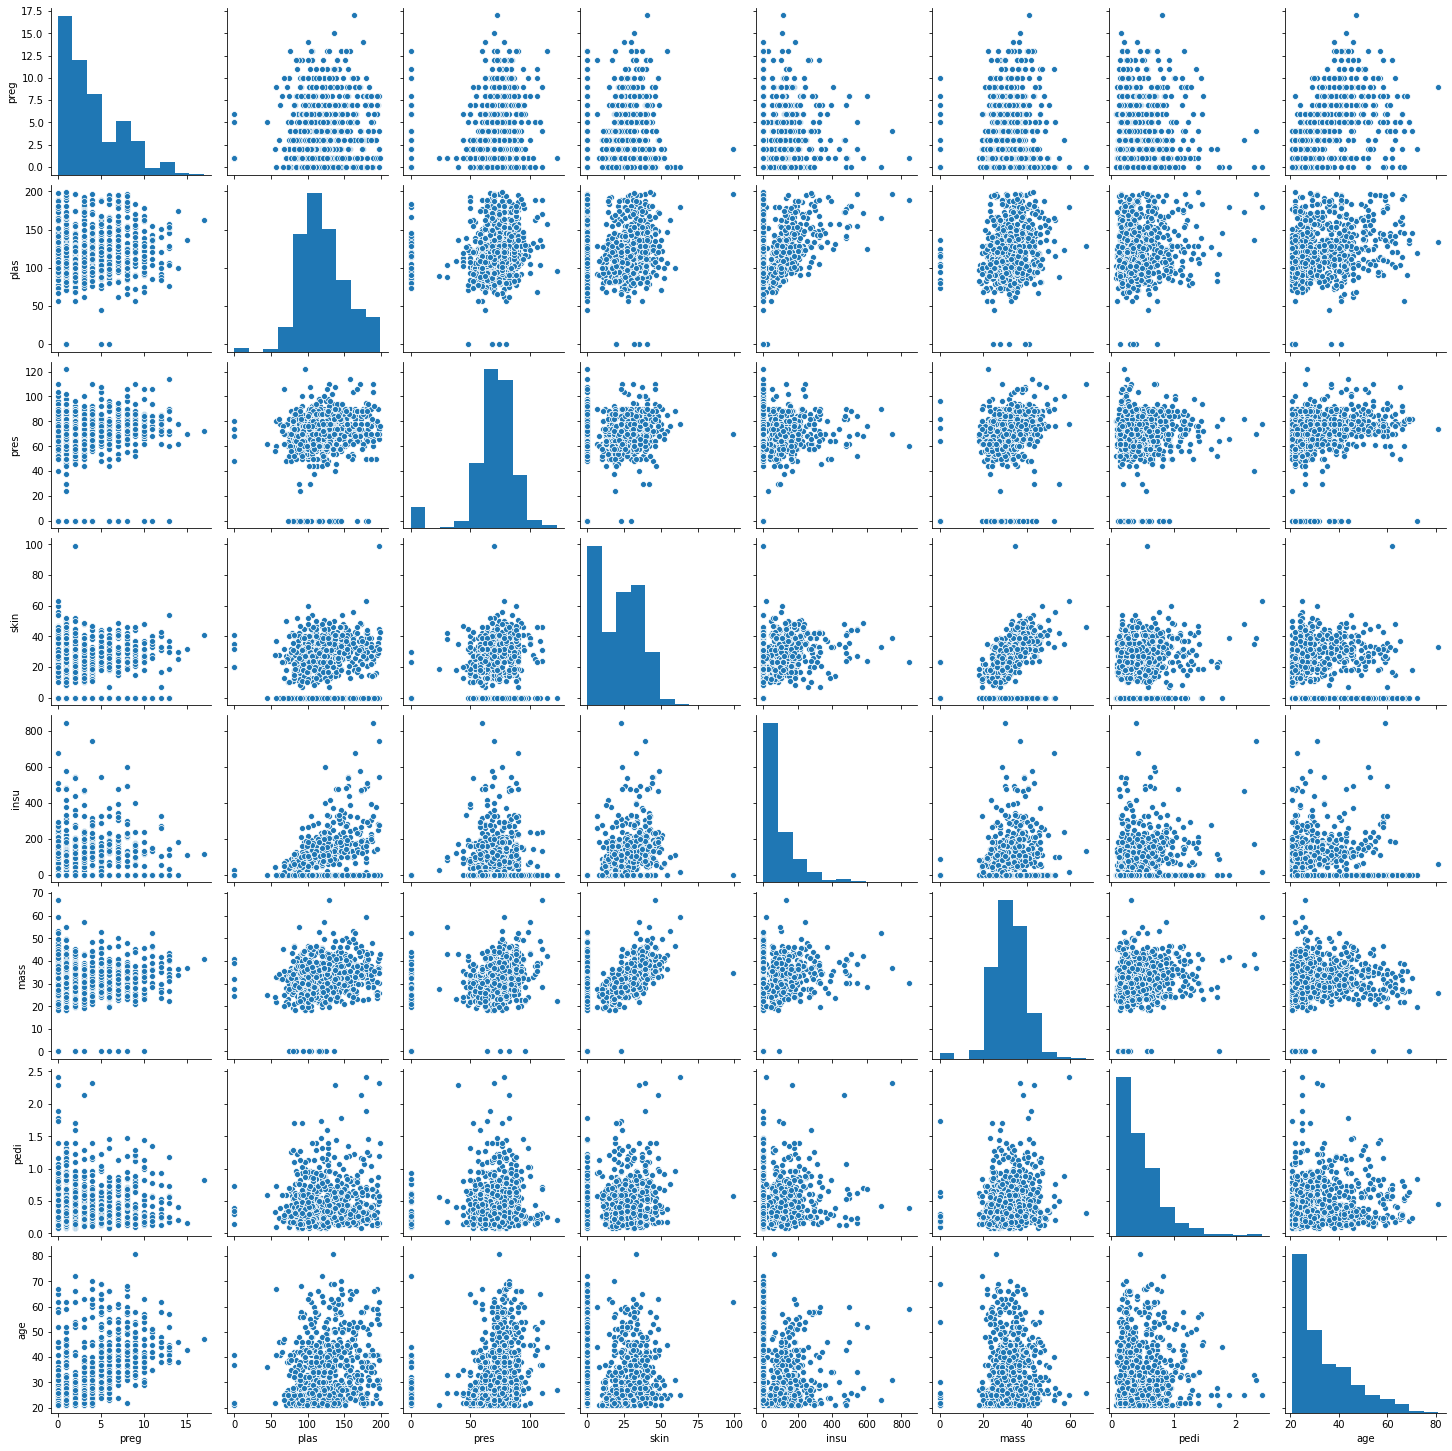

In [29]:
sns.pairplot(data=pima)

In [31]:
cols = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']

In [32]:
newdf = pima.drop('class', axis=1)

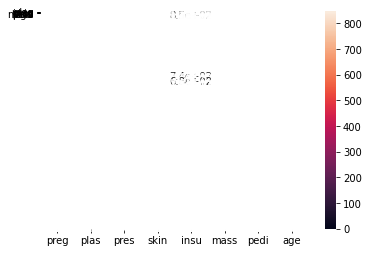

In [33]:
sns.heatmap(data=newdf,
            xticklabels=newdf.columns,
            yticklabels=newdf.columns, 
            annot=True,
            linewidths=0.8)

In [34]:
X = pima.drop('class', axis=1)
y = pima['class']

In [35]:
y.value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=None)

In [60]:
# Create Decision Tree Classifier Object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf.fit(X_train, y_train)

# Predict the response of Test dataset
y_pred = clf.predict(X_test)

In [61]:
# Predict the response of dataset
print('Test Accurace score', metrics.accuracy_score(y_test, y_pred)*100)

Test Accurace score 67.96536796536796


In [62]:
y_pred_train = clf.predict(X_train)

In [63]:
print('Train Accuracy Score', metrics.accuracy_score(y_train, y_pred_train)*100)

Train Accuracy Score 100.0


In [64]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

tested_negative       0.74      0.75      0.74       144
tested_positive       0.58      0.56      0.57        87

       accuracy                           0.68       231
      macro avg       0.66      0.66      0.66       231
   weighted avg       0.68      0.68      0.68       231



In [65]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

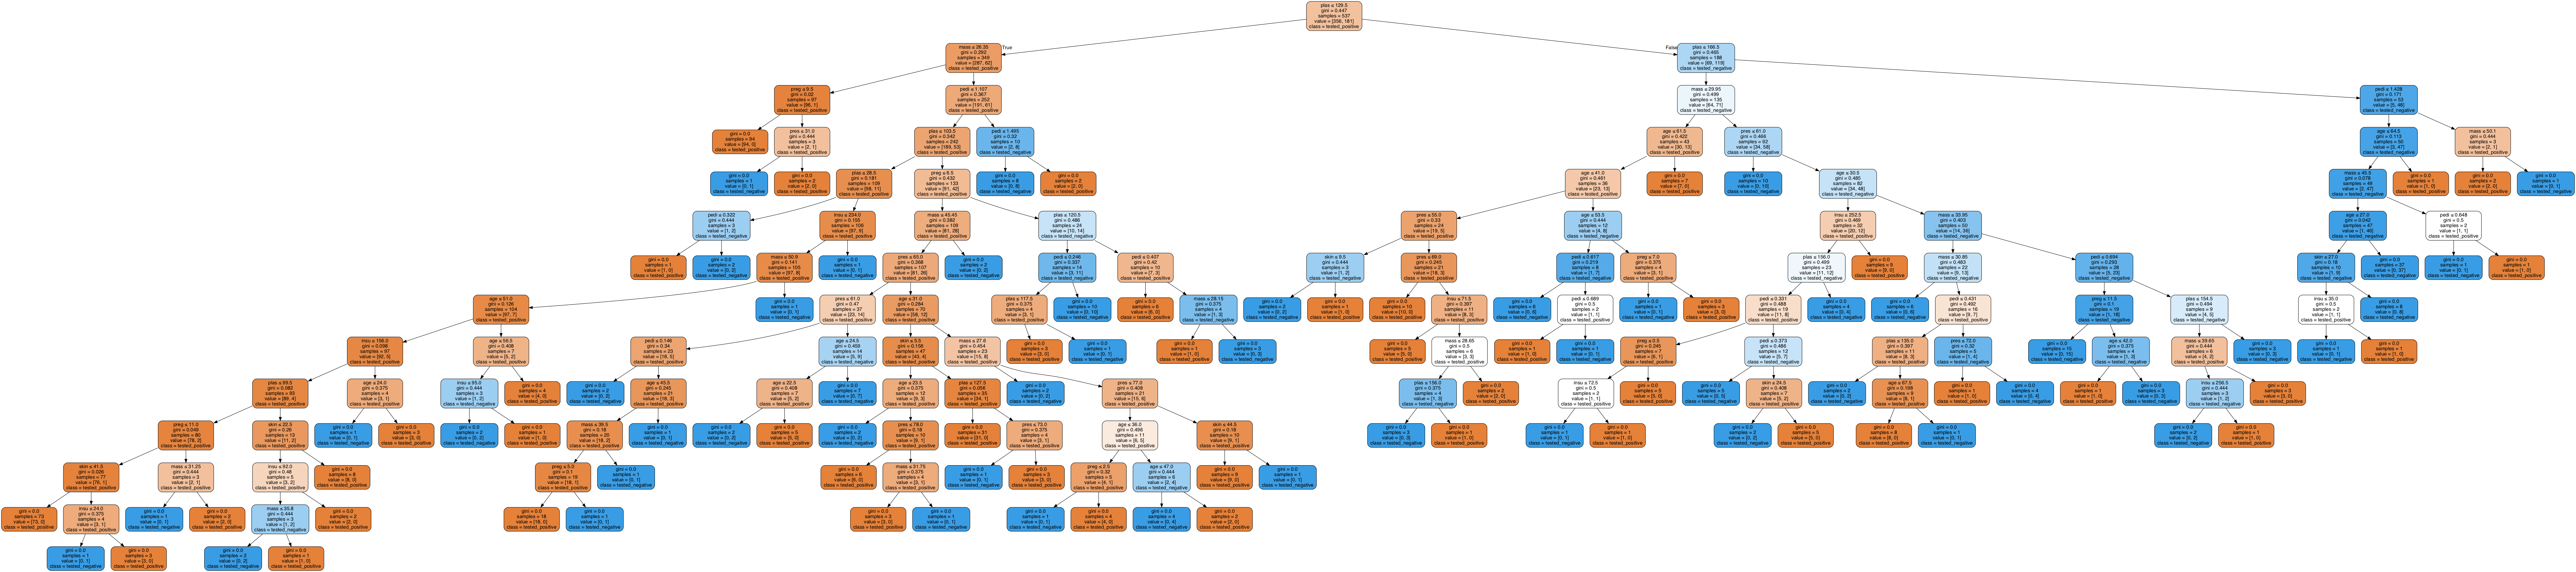

In [66]:
dot_data = StringIO()
export_graphviz(clf,
               out_file=dot_data,
                filled=True,
                special_characters=True,
                rounded=True,
                feature_names=X.columns,
                class_names=['tested_positive', 'tested_negative'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [143]:
# Create Decision Tree Classifier with a defined Depth
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=4)

#Fit Train data
clf1.fit(X_train, y_train)

# Predict test data
y_pred1 = clf1.predict(X_test)

In [144]:
print("Test accuracy score after defining depth:" ,metrics.accuracy_score(y_test, y_pred1)*100)

Test accuracy score after defining depth: 71.86147186147186


In [145]:
y_train_pred1 = clf1.predict(X_train)

In [146]:
print("Train accuracy score after defining depth:" ,metrics.accuracy_score(y_train, y_train_pred1)*100)

Train accuracy score after defining depth: 80.07448789571696


In [147]:
print(classification_report(y_test, y_pred1))

                 precision    recall  f1-score   support

tested_negative       0.71      0.92      0.80       144
tested_positive       0.74      0.39      0.51        87

       accuracy                           0.72       231
      macro avg       0.73      0.65      0.66       231
   weighted avg       0.72      0.72      0.69       231



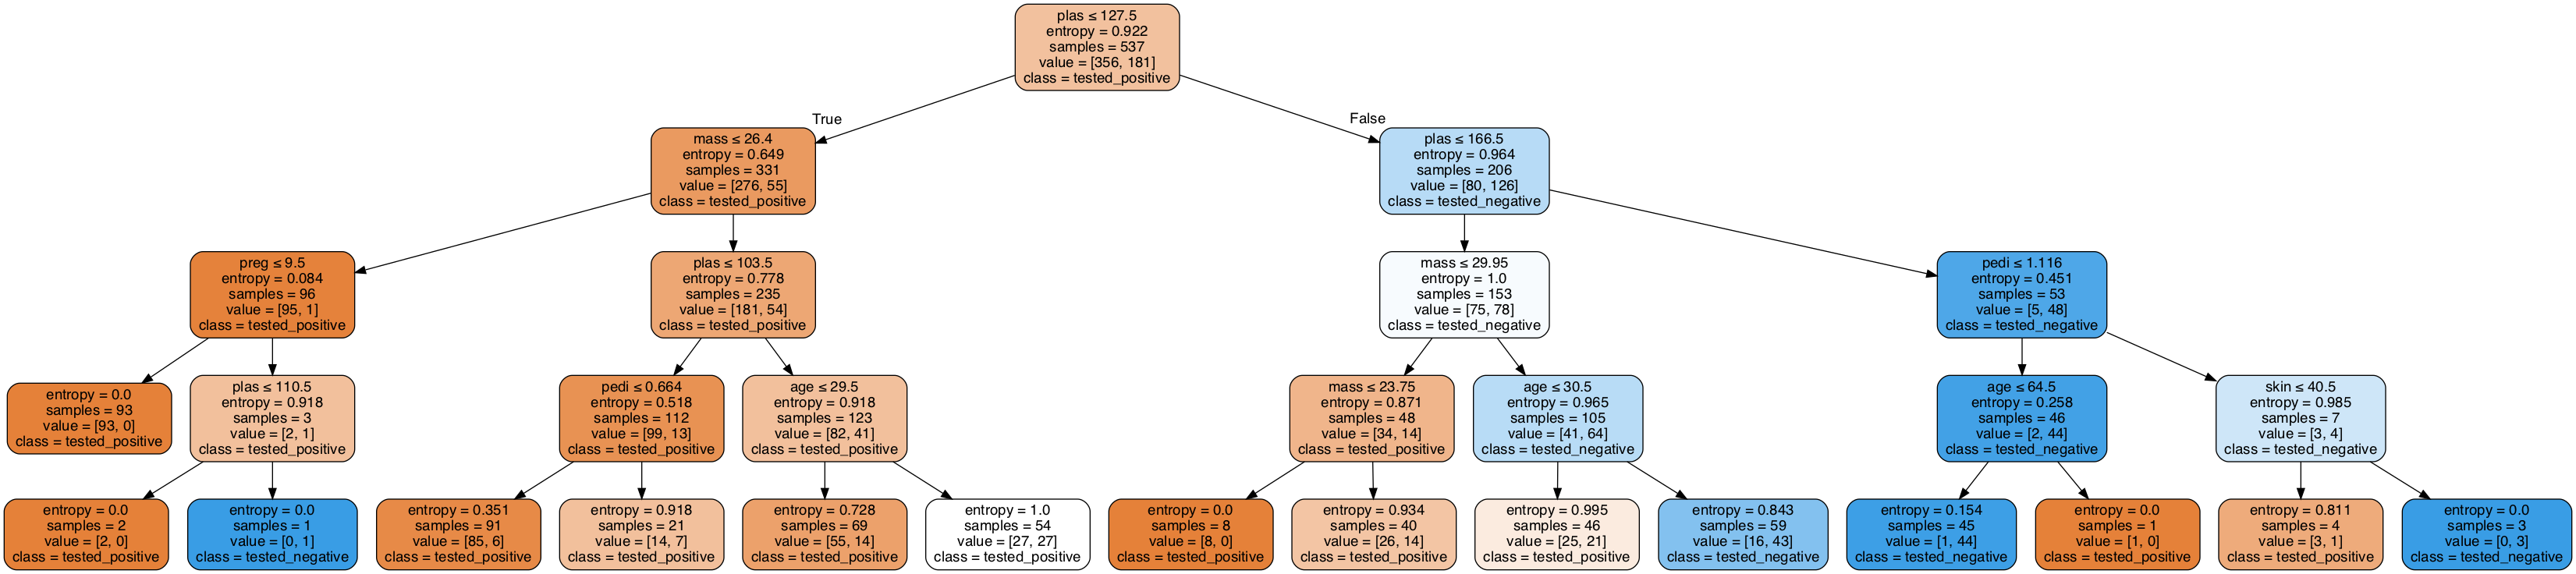

In [115]:
dot_data = StringIO()
export_graphviz(clf1,
                out_file=dot_data,
                filled=True,
                special_characters=True,
                rounded=True,
                feature_names=X.columns,
                class_names = ['tested_positive','tested_negative'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_pruned.png')
Image(graph.create_png())

In [90]:
#!pip install pydotplus

In [91]:
#!pip install six

In [92]:
#!conda install -y graphviz